In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sdeint import sdeint

In [2]:
start_time=0
step_size=1e-3
num_steps=501
initial_state=np.array([[1,0],[0, 1]])
noise_dim = 2
seed = 0
chunk_size = 100
save_directory = 'result_data'

def drift(current_state: np.ndarray, current_time: float):
    return -current_state

def diffusion(current_state: np.ndarray, current_time: float):
    return np.ones_like(current_state)

stochastic_integral = sdeint.StochasticIntegralGenerator(noise_dim, seed)
scheme = sdeint.EulerMaruyamaScheme(drift, diffusion, stochastic_integral)
persistent_storage = sdeint.PersistentChunkwiseStorage(chunk_size, save_directory)
integrator = sdeint.StaticIntegrator(scheme, persistent_storage)
time_array, result_array = integrator.run(start_time, step_size, num_steps, initial_state)

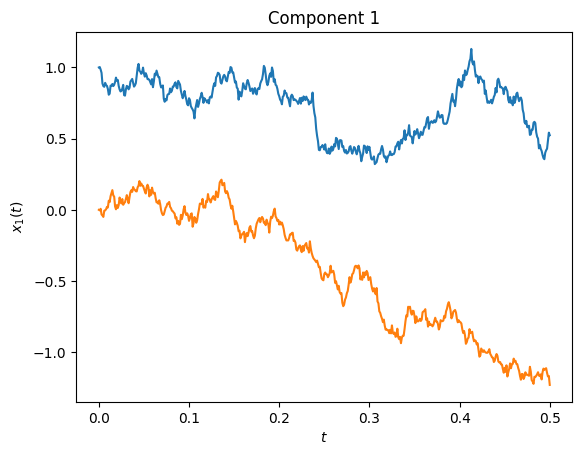

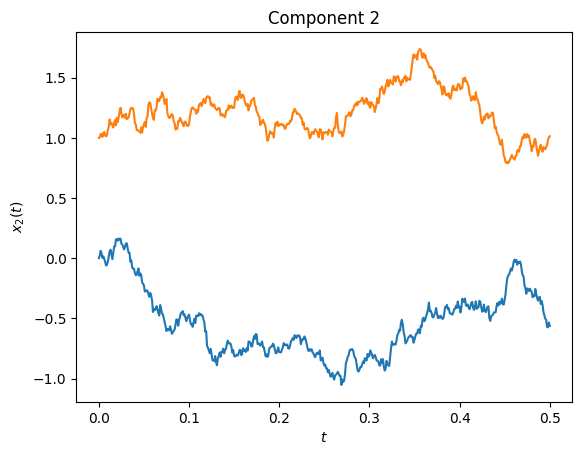

In [3]:
num_components = result_array.shape[0]
num_trajectories = result_array.shape[1]

for i in range(num_components):
    _, ax = plt.subplots()
    ax.set_title(f"Component {i+1}")
    ax.set_xlabel(r"$t$")
    ax.set_ylabel(rf"$x_{{{i+1}}}(t)$")

    for j in range(num_trajectories):
        ax.plot(time_array, result_array[i, j, :])